In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Opne utestasjon-bones.csv
data = pd.read_csv('utestasjon-bones.csv', sep=',')
print(data.head())

                         dato  temperatur    lufttrykk  luftfuktighet  pm25  \
0  2022-11-15 18:59:55.540108   25.967480  1000.728005      25.025103     1   
1  2022-11-15 19:00:28.377546   25.853753  1000.696595      25.183850     1   
2  2022-11-15 19:01:01.211174   26.063974  1000.721758      25.257006     2   
3  2022-11-15 19:01:33.977001   26.058929  1000.690602      25.218070     0   
4  2022-11-15 19:02:06.806198   25.597409  1000.692818      25.406987     0   

   pm10  
0     1  
1     3  
2     2  
3     2  
4     0  


In [3]:
# Convert "dato" to datetime
data['dato'] = pd.to_datetime(data['dato'])

# Format without milliseconds
data['dato'] = data['dato'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Kontroller at datoen er i riktig format
print(data.head())

                  dato  temperatur    lufttrykk  luftfuktighet  pm25  pm10
0  2022-11-15 18:59:55   25.967480  1000.728005      25.025103     1     1
1  2022-11-15 19:00:28   25.853753  1000.696595      25.183850     1     3
2  2022-11-15 19:01:01   26.063974  1000.721758      25.257006     2     2
3  2022-11-15 19:01:33   26.058929  1000.690602      25.218070     0     2
4  2022-11-15 19:02:06   25.597409  1000.692818      25.406987     0     0


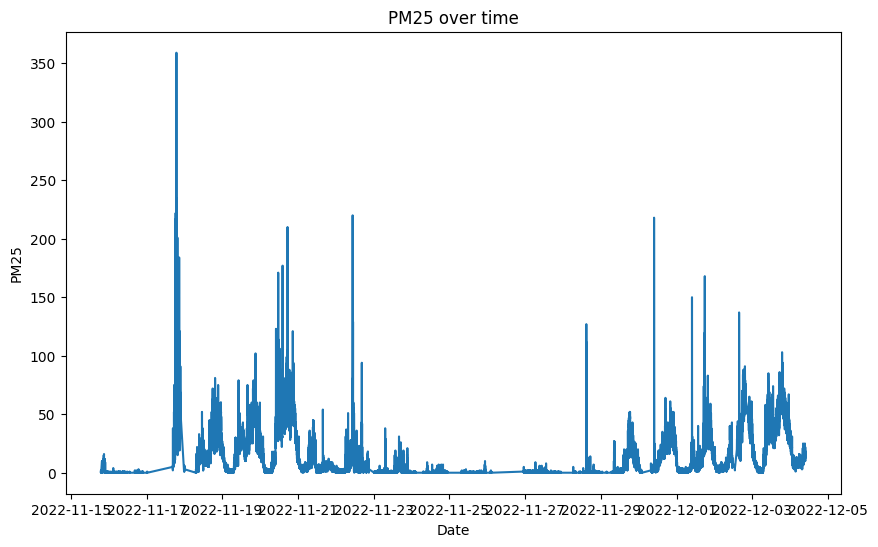

In [4]:
import matplotlib.pyplot as plt

# Ensure that 'dato' is in datetime format
data['dato'] = pd.to_datetime(data['dato'])

# Set 'dato' as the index of the DataFrame
data.set_index('dato', inplace=True)

# Plot 'pm25' over time
plt.figure(figsize=(10,6))
plt.plot(data['pm25'])
plt.title('PM25 over time')
plt.xlabel('Date')
plt.ylabel('PM25')
plt.show()

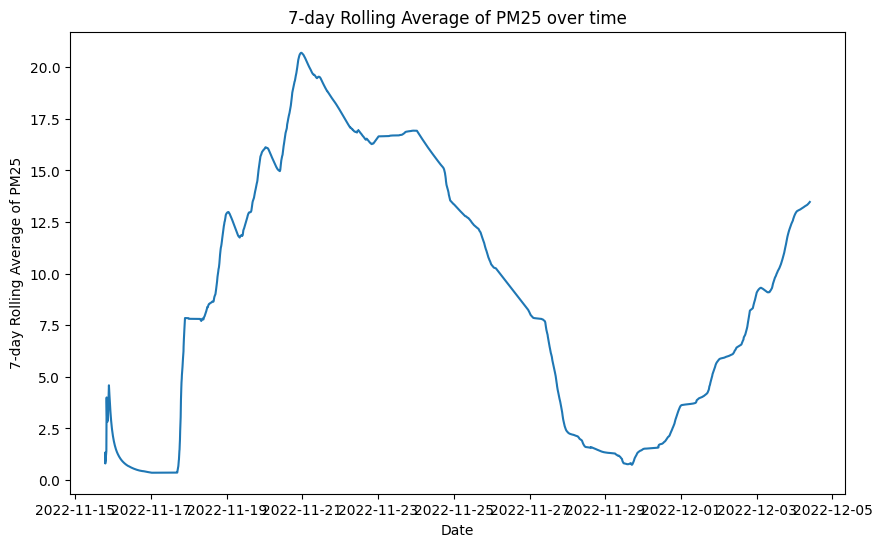

In [5]:
# Calculate the rolling average of 'pm25' with a window size of 7 days
data['pm25_rolling'] = data['pm25'].rolling('7D').mean()

# Plot the rolling average of 'pm25' over time
plt.figure(figsize=(10,6))
plt.plot(data['pm25_rolling'])
plt.title('7-day Rolling Average of PM25 over time')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of PM25')
plt.show()

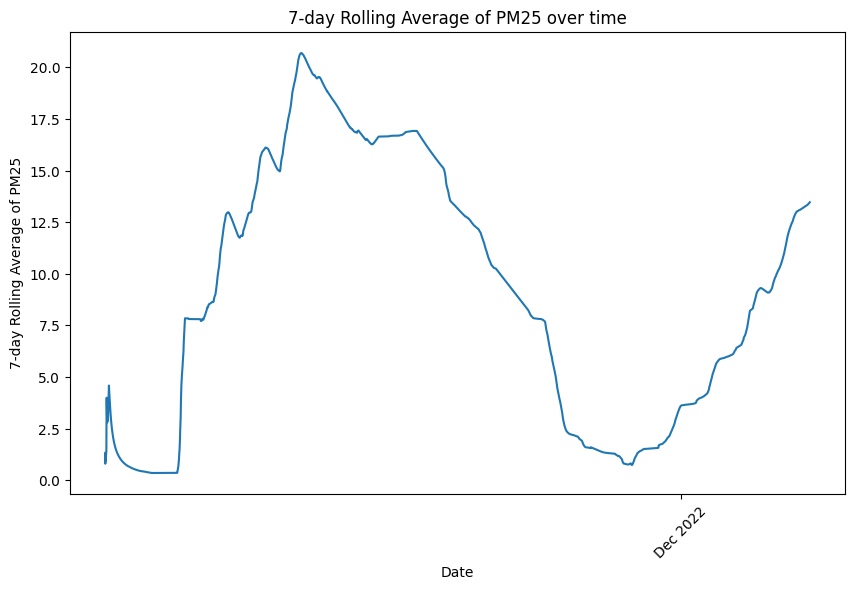

In [6]:
import matplotlib.dates as mdates

# Plot the rolling average of 'pm25' over time
plt.figure(figsize=(10,6))
plt.plot(data['pm25_rolling'])
plt.title('7-day Rolling Average of PM25 over time')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of PM25')

# Format the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # set ticks to be every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format the ticks to be 'Month Year'
plt.xticks(rotation=45)  # rotate the x-axis labels

plt.show()

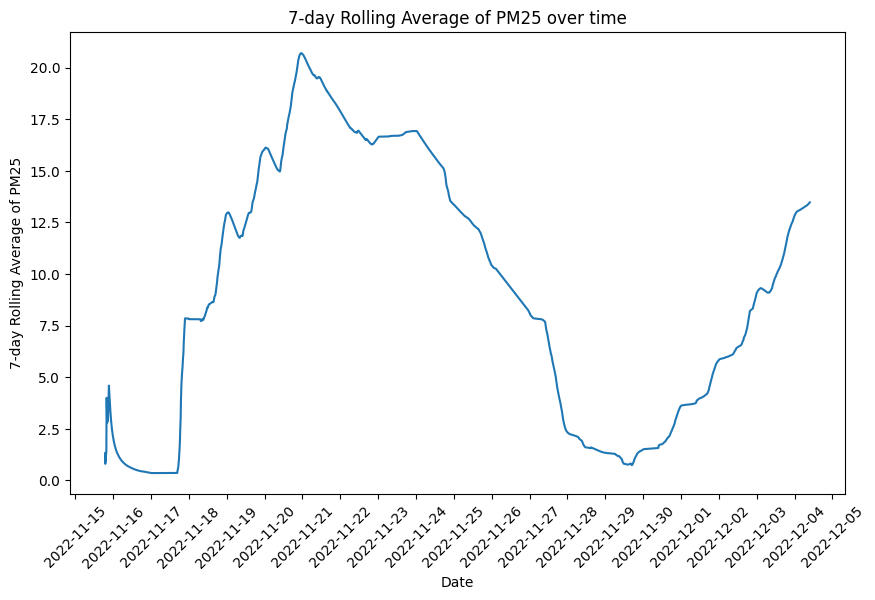

In [8]:
# Plot the rolling average of 'pm25' over time
plt.figure(figsize=(10,6))
plt.plot(data['pm25_rolling'])
plt.title('7-day Rolling Average of PM25 over time')
plt.xlabel('Date')
plt.ylabel('7-day Rolling Average of PM25')

# Format the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # set ticks to be every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format the ticks to be 'Year-Month-Day'
plt.xticks(rotation=45)  # rotate the x-axis labels

plt.show()

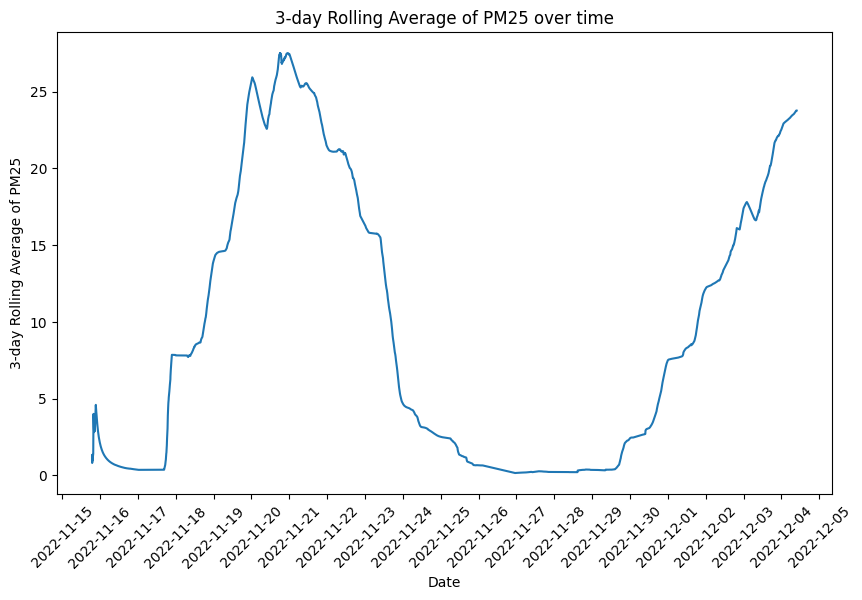

In [9]:
# Calculate the rolling average of 'pm25' with a window size of 3 days
data['pm25_rolling'] = data['pm25'].rolling('3D').mean()

# Plot the rolling average of 'pm25' over time
plt.figure(figsize=(10,6))
plt.plot(data['pm25_rolling'])
plt.title('3-day Rolling Average of PM25 over time')
plt.xlabel('Date')
plt.ylabel('3-day Rolling Average of PM25')

# Format the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator())  # set ticks to be every day
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format the ticks to be 'Year-Month-Day'
plt.xticks(rotation=45)  # rotate the x-axis labels

plt.show()

KeyError: 'temperature'

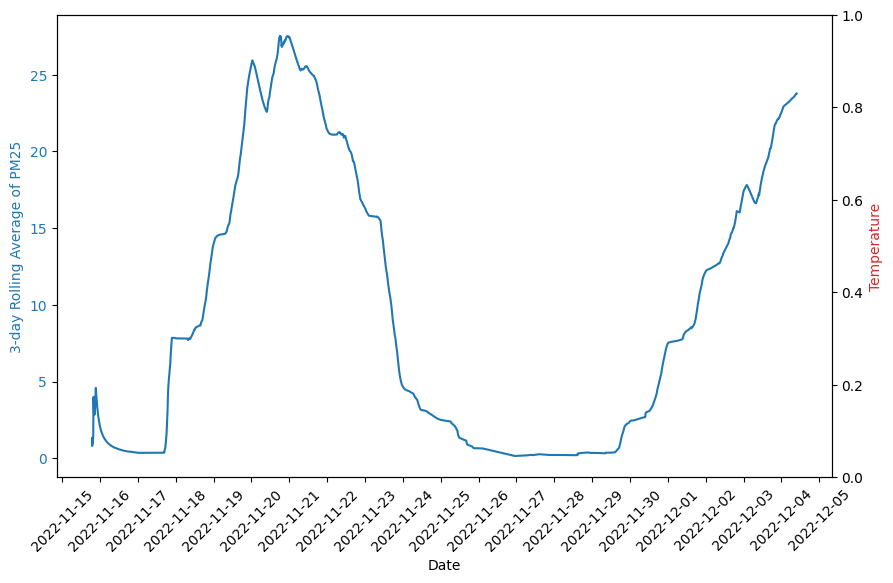

In [10]:
# Calculate the rolling average of 'pm25' with a window size of 3 days
data['pm25_rolling'] = data['pm25'].rolling('3D').mean()

# Plot the rolling average of 'pm25' over time
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('3-day Rolling Average of PM25', color=color)
ax1.plot(data['pm25_rolling'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Format the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator())  # set ticks to be every day
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format the ticks to be 'Year-Month-Day'
plt.xticks(rotation=45)  # rotate the x-axis labels

# Create a second y-axis for the temperature
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(data['temperature'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()